# Numerical Integration

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

## Exercise 14.1

In [2]:
def integrate(f, a, b, N, method):
    
    i = np.arange(0, N, 1)
    x = a + ((2 * i + 1) * (b - a)) / (2 * N)
    
    if method == 'midpoint':
        return ((b - a) / N) * np.sum(f(x))
    
    if method == 'trapezoid':
        return (b - a) / (2 * N) * (f(x[0]) + 2 * np.sum(f(x[1:-1])) + f(x[-1]))
    
    if method == 'simpson':
        i = np.arange(0, 2 * N, 1)
        x = a + (i * (b - a)) / (2 * N)
        return ((b - a) / (6 * (N + 1))) * (f(x[0]) + 4 * np.sum(f(x[1:(2*N-1):2])) + \
                2 * np.sum(f(x[2:(2*N-2):2])) + f(x[-1]))

In [3]:
f = lambda x: 0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2 * x + 1

In [4]:
integrate(f, -10, 10, 500, 'midpoint')

4373.278586816

In [5]:
integrate(f, -10, 10, 1000, 'trapezoid')

4352.321645695981

In [6]:
integrate(f, -10, 10, 500, 'simpson')

4381.574824044178

## Exercise 14.2

In [7]:
def approx_distribution(μ, σ, N, k):
    dist = norm(loc=μ, scale=σ)
    ω = np.zeros(N)
    z = np.linspace(μ - k * σ, μ + k * σ, N)
    ω[0] = dist.cdf((z[0] + z[1]) / 2)
    
    for i in range(1, N-1):
        z_min = (z[i-1] + z[i]) / 2
        z_max = (z[i] + z[i+1]) / 2
        ω[i] = dist.cdf(z_max) - dist.cdf(z_min)
    
    ω[-1] = 1 - dist.cdf(z[-2] + z[-1])
    return z, ω

In [8]:
nodes, weights = approx_distribution(0, 1, 11, 3)
nodes

array([-3. , -2.4, -1.8, -1.2, -0.6,  0. ,  0.6,  1.2,  1.8,  2.4,  3. ])

In [9]:
weights

array([3.46697380e-03, 1.43974468e-02, 4.89427807e-02, 1.17252924e-01,
       1.98028452e-01, 2.35822844e-01, 1.98028452e-01, 1.17252924e-01,
       4.89427807e-02, 1.43974468e-02, 3.33204485e-08])

## Exercise 14.3

In [10]:
def approx_logdistribution(μ, σ, N, k):
    z, ω = approx_distribution(μ, σ, N, k)
    return np.exp(z), ω

In [11]:
nodes, weights = approx_logdistribution(0, 1, 11, 3)
nodes

array([ 0.04978707,  0.09071795,  0.16529889,  0.30119421,  0.54881164,
        1.        ,  1.8221188 ,  3.32011692,  6.04964746, 11.02317638,
       20.08553692])

In [12]:
weights

array([3.46697380e-03, 1.43974468e-02, 4.89427807e-02, 1.17252924e-01,
       1.98028452e-01, 2.35822844e-01, 1.98028452e-01, 1.17252924e-01,
       4.89427807e-02, 1.43974468e-02, 3.33204485e-08])

## Exercise 14.4

In [13]:
μ = 10.5
σ = 0.8
nodes, weights = approx_logdistribution(μ, σ, 11, 3)

In [14]:
np.sum(nodes * weights)

48964.58431238742

In [15]:
np.exp(μ + σ**2/2)

50011.087008521754

## Exercise 14.5

In [16]:
f = lambda x: 0.1 * x**4 - 1.5 * x**3 + 0.53 * x**2 + 2 * x + 1

In [17]:
from scipy.optimize import root

def quad_3(params, a, b):
    
    ω, x = params[:3], params[3:]
    equations = np.empty(len(params))
    
    for i in range(1, len(params)+1):
        equations[i-1] = ((b**i - a**i) / i) - ω @ x**(i-1)
        
    return equations

In [18]:
from scipy.optimize import root

params = root(quad_3, x0=np.ones(6), args=(-10, 10)).x
weights, nodes = params[:3], params[3:]
weights, nodes
np.sum(weights * f(nodes))

4373.333333340381

## Exercise 14.6

In [19]:
from scipy.integrate import quad

In [20]:
quad(f, -10, 10)

(4373.333333333334, 8.109531705284936e-11)

## Exercise 14.7

In [21]:
def approx_π(g, min_x, max_x, N):
    draws = np.random.uniform(min_x, max_x, size=(N, 2))
    return 4 * (1/N) * np.sum(g(draws[:, 0], draws[:, 1]))

In [22]:
def g(x, y):
    return x**2 + y**2 <= 1

In [23]:
approx_π(g, -1, 1, 10000)

3.1508000000000003

In [24]:
tol = 1e-5
diff = 1e3
n = 10
max_N = 100_000
while diff > tol and n < max_N:
    π = approx_π(g, -1, 1, n)
    diff = np.abs(π - 3.1415)
    n += 1

In [25]:
n, π

(6757, 3.141503848431024)

## Exercise 14.8

In [26]:
def n_prime(N):
    primes  = []
    number = 2
    while len(primes) < N:
        ptest  = [number for i in primes if number % i == 0]
        primes += [] if ptest else [number]
        number += 1
    return primes

In [27]:
def weyl(N, d):
    p = n_prime(d)
    n = np.arange(1, N+1, 1)
    o = np.outer(n, np.sqrt(p))
    return o - np.floor(o)

In [28]:
def haber(N, d):
    p = n_prime(d)
    n = np.arange(1, N+1, 1)
    o = np.outer((n * (n + 1)) / 2, np.sqrt(p))
    return o - np.floor(o)

In [106]:
def niederreiter(N, d):
    
    A, B = np.indices((N, d)) + 1
    tuples = np.rec.fromarrays([A, B])
    
    def y(params):
        n, s = params
        return n * 2**(s / (n + 1))
    
    y = np.vectorize(y)
    o = y(tuples)
    return o - np.floor(o)

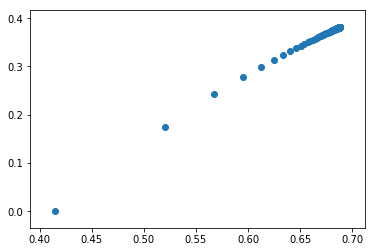

In [109]:
plt.scatter(niederreiter(100, 2)[:, 0], niederreiter(100, 2)[:, 1])
plt.show()

## Exercise 14.9

In [30]:
def approx_π2(g, min_x, max_x, N):
    draws = 2 * haber(N, 2) - 1
    return 4 * (1/N) * np.sum(g(draws[:, 0], draws[:, 1]))

In [31]:
approx_π2(g, -1, 1, 10000)

3.1460000000000004